In [ ]:
import pandas as pd
df = pd.read_csv('/content/T1.csv')
print(df)

              Date/Time  ...  Wind Direction (°)
0      01 01 2018 00:00  ...          259.994904
1      01 01 2018 00:10  ...          268.641113
2      01 01 2018 00:20  ...          272.564789
3      01 01 2018 00:30  ...          271.258087
4      01 01 2018 00:40  ...          265.674286
...                 ...  ...                 ...
50525  31 12 2018 23:10  ...           80.502724
50526  31 12 2018 23:20  ...           84.062599
50527  31 12 2018 23:30  ...           84.742500
50528  31 12 2018 23:40  ...           84.297913
50529  31 12 2018 23:50  ...           82.274620

[50530 rows x 5 columns]


In [ ]:
df.head(10)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613
6,01 01 2018 01:00,447.605713,5.793008,557.372363,266.163605
7,01 01 2018 01:10,387.242188,5.306050,414.898179,257.949493
8,01 01 2018 01:20,463.651215,5.584629,493.677652,253.480698
9,01 01 2018 01:30,439.725708,5.523228,475.706783,258.723785


In [ ]:
#Covert Data/time to index and drop columns Date/Time
df.index=df['Date/Time']
df.drop(['Date/Time'], axis=1, inplace=True)

In [ ]:
df

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,,,,
01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...
31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500


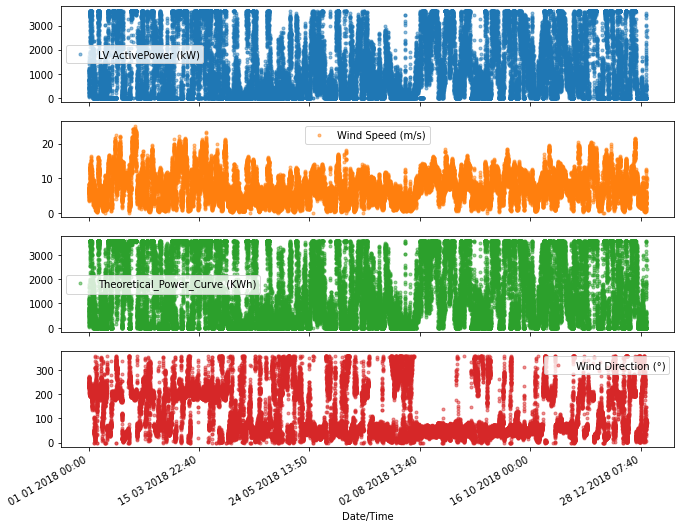

In [ ]:
columns_plot = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)','Wind Direction (°)']
axes = df[columns_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)

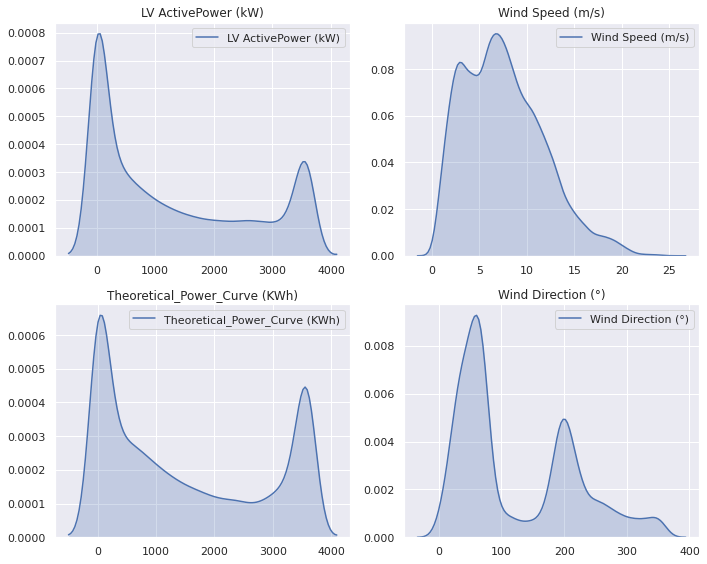

In [ ]:
# Plot the data distributions
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(df.iloc[:,i], shade=True)
    plt.title(df.columns[i])
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/windrose/windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
/usr/local/lib/python3.6/dist-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/usr/local/lib/python3.6/dist-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/usr/local/lib/python3.6/dist-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  retu

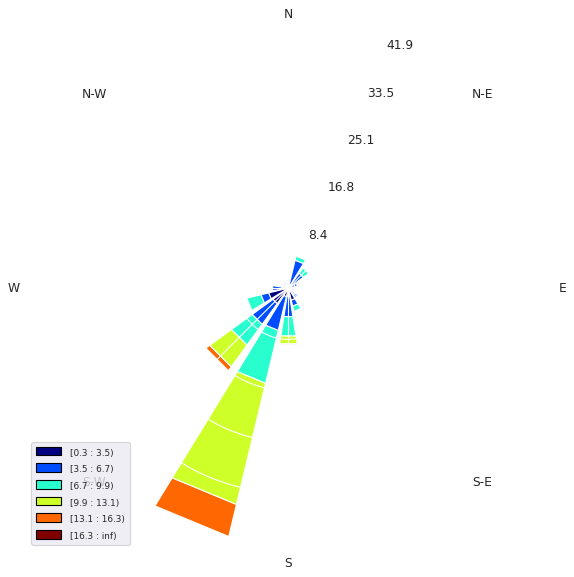

In [ ]:
!pip install windrose
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df['Wind Direction (°)'], df['Wind Speed (m/s)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

In [ ]:
print(df['Wind Direction (°)'].max())
print(df['Wind Direction (°)'].min())

358.189788818359
0.0


In [ ]:
bins_range = np.arange(0,370,30)
print(bins_range)

[  0  30  60  90 120 150 180 210 240 270 300 330 360]


In [ ]:
def binning(x, bins):
    kwargs = {}
    if x == max(bins):
        kwargs['right'] = True
    bin = bins[np.digitize([x], bins, **kwargs)[0]]
    bin_lower = bins[np.digitize([x], bins, **kwargs)[0]-1]
    return '[{0}-{1}]'.format(bin_lower, bin)

In [ ]:
df['Bin'] = df['Wind Direction (°)'].apply(binning, bins=bins_range)

In [ ]:
#group the binned data by mean and std
grouped = df.groupby('Bin')
grouped_std = grouped.std()
grouped_mean = grouped.mean()
grouped_mean.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Bin,,,,
[0-30],453.655054,5.243216,469.021609,18.493355
[120-150],138.204084,2.973994,158.964754,139.568484
[150-180],757.017438,5.319737,830.572879,165.902151
[180-210],2287.786039,9.696013,2384.056694,198.356455
[210-240],1630.614582,7.775812,1692.419064,223.137776


In [ ]:
print(df['Wind Speed (m/s)'].max())
print(df['Wind Speed (m/s)'].min())

16.2936706542968
0.29050979018211404


In [ ]:
bins_range = np.arange(0,26,0.5)

In [ ]:
df['Bin'] = df['Wind Speed (m/s)'].apply(binning, bins=bins_range)

In [ ]:
grouped = df.groupby('Bin')
grouped_std = grouped.std()
grouped_mean = grouped.mean()
grouped_mean

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Bin,,,,
[0.0-0.5],0.000000,0.376608,0.000000,141.928304
[0.5-1.0],0.000000,0.760774,0.000000,184.119226
[1.0-1.5],0.000000,1.293092,0.000000,214.199471
[1.5-2.0],0.000000,1.744287,0.000000,192.889219
[10.0-10.5],2625.750071,10.312635,2968.119586,200.068780
[10.5-11.0],2871.159434,10.745284,3172.026235,201.246599
[11.0-11.5],3133.626753,11.261879,3355.020145,203.169837
[11.5-12.0],3352.866255,11.767961,3479.304467,204.183916
[12.0-12.5],3503.761866,12.230046,3551.885485,206.299211


In [ ]:
step = bins_range_ws[1]-bins_range_ws[0]
new_index = ['[{0}-{1}]'.format(x, x+step) for x in bins_range_ws]
new_index.pop(-1) #We dont need [360-375]...
grouped_mean = grouped_mean.reindex(new_index)

In [ ]:
#Rearranged and visulaizing the mean of each windspeed bin 
grouped_mean

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Bin,,,,
[0.0-0.5],0.000000,0.376608,0.000000,141.928304
[0.5-1.0],0.000000,0.760774,0.000000,184.119226
[1.0-1.5],0.000000,1.293092,0.000000,214.199471
[1.5-2.0],0.000000,1.744287,0.000000,192.889219
[2.0-2.5],-0.010079,2.276294,0.000000,192.408102
[2.5-3.0],0.105366,2.761880,0.000000,198.341130
[3.0-3.5],5.809843,3.266398,31.989161,186.292123
[3.5-4.0],50.675145,3.766648,88.939949,143.848515
[4.0-4.5],121.518072,4.260769,173.581674,127.440123


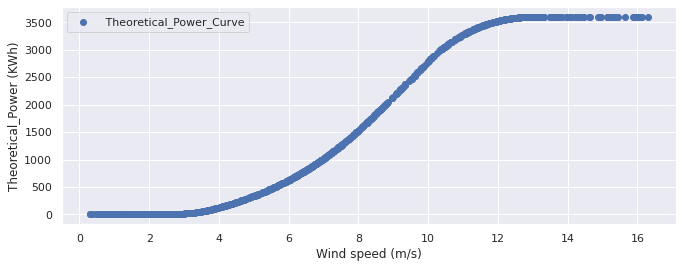

In [ ]:
#Power Curve Anaylsis
#Theoretical power curve
plt.scatter(df['Wind Speed (m/s)'],df['Theoretical_Power_Curve (KWh)'])
plt.ylabel('Theoretical_Power (KWh)')
plt.xlabel('Wind speed (m/s)')
plt.grid(True)
plt.legend([' Theoretical_Power_Curve'], loc='upper left')
plt.show()


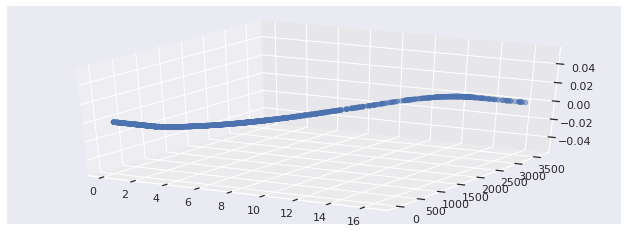

In [ ]:
# comparision in 3d
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot a sin curve using the x and y axes.
ax.scatter(df['Wind Speed (m/s)'],df['Theoretical_Power_Curve (KWh)'] , zs=0, zdir='z', label='curve in (x, y)')

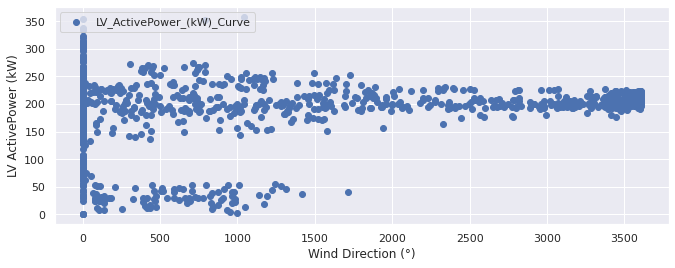

In [ ]:
#Power Curve Anaylsis
#Theoretical power curve
plt.scatter(df['LV ActivePower (kW)'],df['Wind Direction (°)'])
plt.ylabel('LV ActivePower (kW)')
plt.xlabel('Wind Direction (°)')
plt.grid(True)
plt.legend(['LV_ActivePower_(kW)_Curve'], loc='upper left')
plt.show()


In [ ]:
new_df=df[((df["LV ActivePower (kW)"]!=0)&(df["Wind Speed (m/s)"]>3.5)) | (df["Wind Speed (m/s)"]<=3.5)]
new_1 = (new_df[ (new_df['Wind Speed (m/s)'] < 12.5)  | (new_df['LV ActivePower (kW)'] >= 3000) ])
new_2 = (new_1[ (new_1['Wind Speed (m/s)'] < 9.5)  | (new_1['LV ActivePower (kW)'] >= 1500) ])
new_3 = (new_2[ (new_2['Wind Speed (m/s)'] < 6.5)  | (new_2['LV ActivePower (kW)'] >= 500) ])

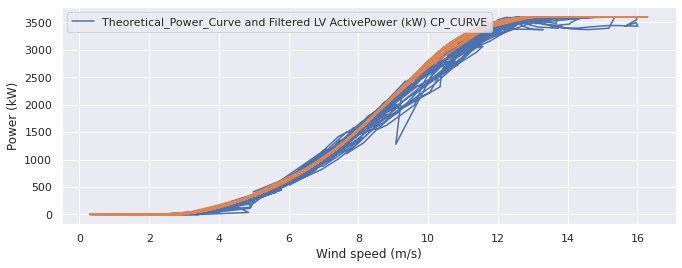

In [ ]:
plt.plot(new_3['Wind Speed (m/s)'],new_3['LV ActivePower (kW)'])
plt.plot(df['Wind Speed (m/s)'],df['Theoretical_Power_Curve (KWh)'], label='Theoretical_Power_Curve (KWh)')
#plt.scatter(new_3['Wind Speed (m/s)'],new_3['LV ActivePower (kW)'])
#plt.scatter(df['Wind Speed (m/s)'],df['Theoretical_Power_Curve (KWh)'], label='Theoretical_Power_Curve (KWh)')
plt.ylabel('Power (kW)')
plt.xlabel('Wind speed (m/s)')
plt.grid(True)
plt.legend(['Theoretical_Power_Curve and Filtered LV ActivePower (kW) CP_CURVE'], loc='upper left')
plt.show()

In [ ]:
def CP_group(val):
    if val<3.5:
        return 'Region_1'
    elif val> 3.5 and val < 10:
        return 'Region_1.5'
    elif val>10 and val < 15:
        return 'Region_2'
    elif val>15 and val < 23:
        return 'Region_2.5'
    else:
        return 'Region_3'
df['Operational Category']=df['Wind Speed (m/s)'].apply(CP_group)

In [ ]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Bin,Operational Category
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,[5.0-5.5],Region_1.5
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,[5.5-6.0],Region_1.5
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,[5.0-5.5],Region_1.5
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,[5.5-6.0],Region_1.5
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,[5.5-6.0],Region_1.5


In [ ]:
df.isnull().sum()
df.dtypes

Date/Time                         object
LV ActivePower (kW)              float64
Wind Speed (m/s)                 float64
Theoretical_Power_Curve (KWh)    float64
Wind Direction (°)               float64
Bin                               object
Operational Category              object
dtype: object

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50528 entries, 2 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50528 non-null  object 
 1   LV_ActivePower_(kW)            50528 non-null  float64
 2   Wind_Speed_(m/s)               50528 non-null  float64
 3   Theoretical_Power_Curve_(KWh)  50528 non-null  float64
 4   Wind_Direction_(°)             50528 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.8+ MB


In [ ]:
df_float = df[df.dtypes[df.dtypes == "float"].index]

df_Cat = df[df.dtypes[df.dtypes == "object"].index]

In [ ]:
df_float.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,380.047791,5.311336,416.328908,259.994904
1,453.769196,5.672167,519.917511,268.641113
2,306.376587,5.216037,390.900016,272.564789
3,419.645905,5.659674,516.127569,271.258087
4,380.650696,5.577941,491.702972,265.674286


In [ ]:
df_Cat.head()

,Date/Time,Bin,Operational Category
0,01 01 2018 00:00,[5.0-5.5],Region_1.5
1,01 01 2018 00:10,[5.5-6.0],Region_1.5
2,01 01 2018 00:20,[5.0-5.5],Region_1.5
3,01 01 2018 00:30,[5.5-6.0],Region_1.5
4,01 01 2018 00:40,[5.5-6.0],Region_1.5


In [ ]:
df_Cat = pd.get_dummies(df_Cat)

In [ ]:
df_Cat.head()

,Date/Time_01 01 2018 00:00,Date/Time_01 01 2018 00:10,Date/Time_01 01 2018 00:20,Date/Time_01 01 2018 00:30,Date/Time_01 01 2018 00:40,Date/Time_01 01 2018 00:50,Date/Time_01 01 2018 01:00,Date/Time_01 01 2018 01:10,Date/Time_01 01 2018 01:20,Date/Time_01 01 2018 01:30,Date/Time_01 01 2018 01:40,Date/Time_01 01 2018 01:50,Date/Time_01 01 2018 02:00,Date/Time_01 01 2018 02:10,Date/Time_01 01 2018 02:20,Date/Time_01 01 2018 02:30,Date/Time_01 01 2018 02:40,Date/Time_01 01 2018 02:50,Date/Time_01 01 2018 03:00,Date/Time_01 01 2018 03:10,Date/Time_01 01 2018 03:20,Date/Time_01 01 2018 03:30,Date/Time_01 01 2018 03:40,Date/Time_01 01 2018 03:50,Date/Time_01 01 2018 04:00,Date/Time_01 01 2018 04:10,Date/Time_01 01 2018 04:20,Date/Time_01 01 2018 04:30,Date/Time_01 01 2018 04:40,Date/Time_01 01 2018 04:50,Date/Time_01 01 2018 05:00,Date/Time_01 01 2018 05:10,Date/Time_01 01 2018 05:20,Date/Time_01 01 2018 05:30,Date/Time_01 01 2018 05:40,Date/Time_01 01 2018 05:50,Date/Time_01 01 2018 06:00,Date/Time_01 01 2018 06:10,Date/Time_01 01 2018 06:20,Date/Time_01 01 2018 06:30,...,Date/Time_08 01 2018 01:40,Date/Time_08 01 2018 01:50,Date/Time_08 01 2018 02:00,Bin_[0.0-0.5],Bin_[0.5-1.0],Bin_[1.0-1.5],Bin_[1.5-2.0],Bin_[10.0-10.5],Bin_[10.5-11.0],Bin_[11.0-11.5],Bin_[11.5-12.0],Bin_[12.0-12.5],Bin_[12.5-13.0],Bin_[13.0-13.5],Bin_[13.5-14.0],Bin_[14.0-14.5],Bin_[14.5-15.0],Bin_[15.0-15.5],Bin_[15.5-16.0],Bin_[16.0-16.5],Bin_[2.0-2.5],Bin_[2.5-3.0],Bin_[3.0-3.5],Bin_[3.5-4.0],Bin_[4.0-4.5],Bin_[4.5-5.0],Bin_[5.0-5.5],Bin_[5.5-6.0],Bin_[6.0-6.5],Bin_[6.5-7.0],Bin_[7.0-7.5],Bin_[7.5-8.0],Bin_[8.0-8.5],Bin_[8.5-9.0],Bin_[9.0-9.5],Bin_[9.5-10.0],Operational Category_Region_1,Operational Category_Region_1.5,Operational Category_Region_2,Operational Category_Region_2.5
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
Result=df_float.join([df_Cat])
Result.head(5)

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Date/Time_01 01 2018 00:00,Date/Time_01 01 2018 00:10,Date/Time_01 01 2018 00:20,Date/Time_01 01 2018 00:30,Date/Time_01 01 2018 00:40,Date/Time_01 01 2018 00:50,Date/Time_01 01 2018 01:00,Date/Time_01 01 2018 01:10,Date/Time_01 01 2018 01:20,Date/Time_01 01 2018 01:30,Date/Time_01 01 2018 01:40,Date/Time_01 01 2018 01:50,Date/Time_01 01 2018 02:00,Date/Time_01 01 2018 02:10,Date/Time_01 01 2018 02:20,Date/Time_01 01 2018 02:30,Date/Time_01 01 2018 02:40,Date/Time_01 01 2018 02:50,Date/Time_01 01 2018 03:00,Date/Time_01 01 2018 03:10,Date/Time_01 01 2018 03:20,Date/Time_01 01 2018 03:30,Date/Time_01 01 2018 03:40,Date/Time_01 01 2018 03:50,Date/Time_01 01 2018 04:00,Date/Time_01 01 2018 04:10,Date/Time_01 01 2018 04:20,Date/Time_01 01 2018 04:30,Date/Time_01 01 2018 04:40,Date/Time_01 01 2018 04:50,Date/Time_01 01 2018 05:00,Date/Time_01 01 2018 05:10,Date/Time_01 01 2018 05:20,Date/Time_01 01 2018 05:30,Date/Time_01 01 2018 05:40,Date/Time_01 01 2018 05:50,...,Date/Time_08 01 2018 01:40,Date/Time_08 01 2018 01:50,Date/Time_08 01 2018 02:00,Bin_[0.0-0.5],Bin_[0.5-1.0],Bin_[1.0-1.5],Bin_[1.5-2.0],Bin_[10.0-10.5],Bin_[10.5-11.0],Bin_[11.0-11.5],Bin_[11.5-12.0],Bin_[12.0-12.5],Bin_[12.5-13.0],Bin_[13.0-13.5],Bin_[13.5-14.0],Bin_[14.0-14.5],Bin_[14.5-15.0],Bin_[15.0-15.5],Bin_[15.5-16.0],Bin_[16.0-16.5],Bin_[2.0-2.5],Bin_[2.5-3.0],Bin_[3.0-3.5],Bin_[3.5-4.0],Bin_[4.0-4.5],Bin_[4.5-5.0],Bin_[5.0-5.5],Bin_[5.5-6.0],Bin_[6.0-6.5],Bin_[6.5-7.0],Bin_[7.0-7.5],Bin_[7.5-8.0],Bin_[8.0-8.5],Bin_[8.5-9.0],Bin_[9.0-9.5],Bin_[9.5-10.0],Operational Category_Region_1,Operational Category_Region_1.5,Operational Category_Region_2,Operational Category_Region_2.5
0,380.047791,5.311336,416.328908,259.994904,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,453.769196,5.672167,519.917511,268.641113,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,306.376587,5.216037,390.900016,272.564789,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,419.645905,5.659674,516.127569,271.258087,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,380.650696,5.577941,491.702972,265.674286,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')